# Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Problem Statement

In this data, we have one independent variable 'Temperature' and one dependent variable 'Revenue'. we have to build a DecisionTreeRegressor to study the relationship b/w the two variables  of the Ice Cream Shop and then predict the revenue for the ice cream shop based on the temperature on a particular day.

# Importing Dataset

Dataset Link : - [CLICK HERE](https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')

In [4]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [6]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
df.isna().sum()

,0
Temperature,0
Revenue,0


In [9]:
df.isnull().sum()

,0
Temperature,0
Revenue,0


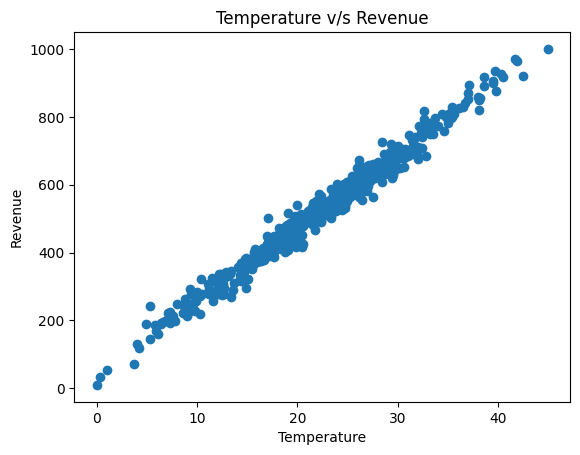

In [15]:
plt.scatter(data=df,x='Temperature',y='Revenue')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temperature v/s Revenue')
plt.show()

In [16]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


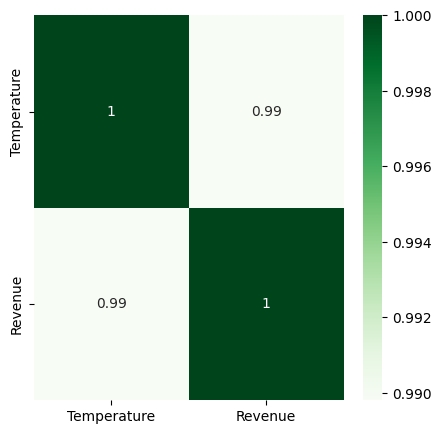

In [18]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

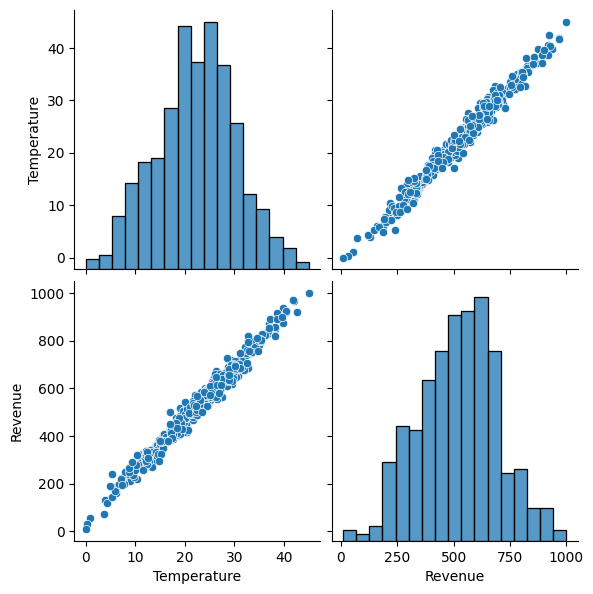

In [25]:
sns.pairplot(df,height=3)
plt.show()

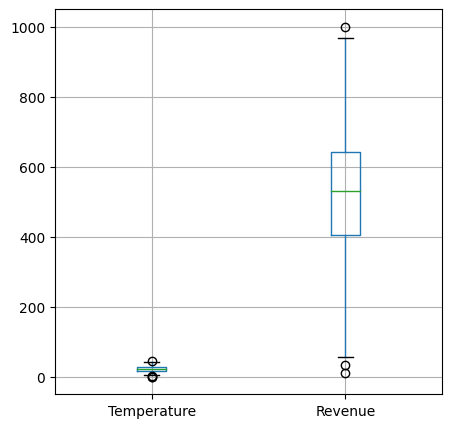

In [27]:
plt.figure(figsize=(5,5))
df.boxplot()
plt.show()

# Spliting of data - Training & Testing set

In [29]:
x = np.array(df.Temperature.values).reshape(-1,1)
y = np.array(df.Revenue.values).reshape(-1,1)

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [98]:
len(x_train)

400

In [99]:
len(x_test)

100

In [100]:
print(len(y_train))
print(len(y_test))

400
100


# Choosing the model

In [101]:
regressor = DecisionTreeRegressor()

# Taining the model

In [102]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

# Testing the model

In [103]:
y_pred = regressor.predict(x_test)

# Comparing the y_test with y_pred

In [104]:
comp = pd.DataFrame({'Actual':y_test.reshape(-1),'Predicted':y_pred.reshape(-1)})

In [105]:
comp

,Actual,Predicted
0,659.873287,702.994011
1,623.248701,649.729072
2,559.135869,603.232942
3,497.752318,521.775445
4,627.901841,612.243721
...,...,...
95,564.310532,607.542148
96,643.944327,651.504304
97,653.986736,633.504009
98,412.082357,441.508733


Text(0, 0.5, 'Predicted')

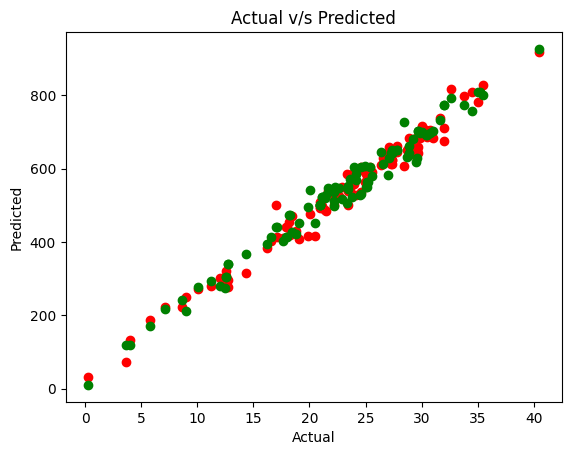

In [106]:
plt.scatter(x_test,y_test,color='red')
plt.scatter(x_test,y_pred,color='green')
plt.title('Actual v/s Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [107]:
comp.corr()

,Actual,Predicted
Actual,1.000000,0.977128
Predicted,0.977128,1.000000


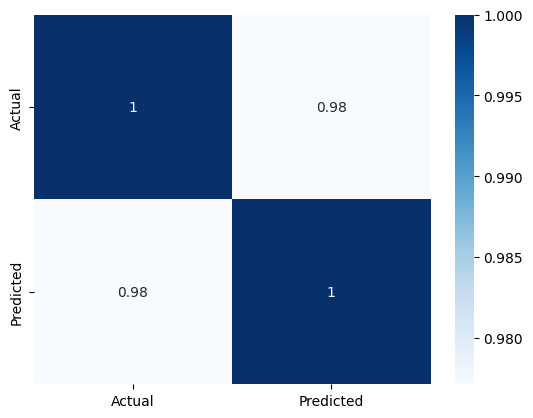

In [108]:
sns.heatmap(comp.corr(),annot=True,cmap='Blues')
plt.show()

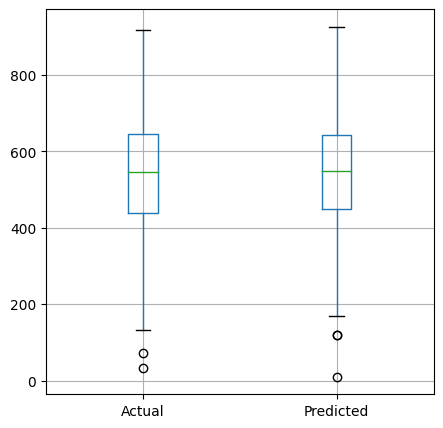

In [109]:
plt.figure(figsize=(5,5))
comp.boxplot()
plt.show()

# Performance

In [110]:
regressor.score(x_test,y_test)

0.9534772958686918

In [111]:
mean_squared_error(y_test,y_pred)

1328.7245076491977

In [112]:
mean_absolute_error(y_test,y_pred)

28.77583048709999